In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler 


In [2]:
df = pd.read_csv(r'F:\DataSets\imdbTop250.csv')


In [3]:
df.shape

(6500, 14)

In [4]:
df.columns


Index(['Ranking', 'IMDByear', 'IMDBlink', 'Title', 'Date', 'RunTime', 'Genre',
       'Rating', 'Score', 'Votes', 'Gross', 'Director', 'Cast1', 'Cast2'],
      dtype='object')

In [5]:
df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1299781,322.74,George Lucas,Mark Hamill,Harrison Ford
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2529673,28.34,Frank Darabont,Tim Robbins,Morgan Freeman
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,665213,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.0,1045626,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,53316,NaN,Nick Park,Peter Sallis,Peter Hawkins


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   6500 non-null   int64  
 1   IMDByear  6500 non-null   int64  
 2   IMDBlink  6500 non-null   object 
 3   Title     6500 non-null   object 
 4   Date      6500 non-null   int64  
 5   RunTime   6500 non-null   int64  
 6   Genre     6500 non-null   object 
 7   Rating    6500 non-null   float64
 8   Score     5674 non-null   float64
 9   Votes     6500 non-null   int64  
 10  Gross     5691 non-null   float64
 11  Director  6500 non-null   object 
 12  Cast1     6500 non-null   object 
 13  Cast2     6500 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 711.1+ KB


In [7]:
df.dtypes

Ranking       int64
IMDByear      int64
IMDBlink     object
Title        object
Date          int64
RunTime       int64
Genre        object
Rating      float64
Score       float64
Votes         int64
Gross       float64
Director     object
Cast1        object
Cast2        object
dtype: object

In [8]:
df.isnull().sum()

Ranking       0
IMDByear      0
IMDBlink      0
Title         0
Date          0
RunTime       0
Genre         0
Rating        0
Score       826
Votes         0
Gross       809
Director      0
Cast1         0
Cast2         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,5674.000000,6.500000e+03,5691.000000
mean,125.500000,2008.500000,1978.649385,125.603385,8.171431,84.247268,4.843501e+05,70.709617
std,72.173758,7.500577,23.625371,31.138483,0.327116,10.053112,4.743856e+05,103.075729
min,1.000000,1996.000000,1920.000000,16.000000,5.500000,61.000000,9.194000e+03,0.010000
25%,63.000000,2002.000000,1959.000000,104.000000,8.000000,77.000000,1.214630e+05,5.320000
50%,125.500000,2008.500000,1984.000000,121.000000,8.100000,85.000000,3.057770e+05,26.240000
75%,188.000000,2015.000000,1998.000000,138.000000,8.300000,92.000000,7.341210e+05,92.435000
max,250.000000,2021.000000,2021.000000,321.000000,9.300000,100.000000,2.529673e+06,936.660000


In [15]:
df['Score'].fillna(df['Score'].mean())

0       90.000000
1       80.000000
2       83.000000
3       77.000000
4       84.247268
          ...    
6495    96.000000
6496    84.247268
6497    77.000000
6498    84.247268
6499    84.247268
Name: Score, Length: 6500, dtype: float64

In [17]:
df['Gross'].fillna(df['Gross'].mean())

0       322.740000
1        28.340000
2        16.500000
3        23.340000
4        70.709617
           ...    
6495      0.060000
6496      0.750000
6497     30.860000
6498     70.709617
6499     70.709617
Name: Gross, Length: 6500, dtype: float64

In [18]:
df.isnull().sum()

Ranking     0
IMDByear    0
IMDBlink    0
Title       0
Date        0
RunTime     0
Genre       0
Rating      0
Score       0
Votes       0
Gross       0
Director    0
Cast1       0
Cast2       0
dtype: int64

In [19]:
df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.000000,1299781,322.740000,George Lucas,Mark Hamill,Harrison Ford
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.000000,2529673,28.340000,Frank Darabont,Tim Robbins,Morgan Freeman
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.000000,665213,16.500000,Danny Boyle,Ewan McGregor,Ewen Bremner
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.000000,1045626,23.340000,Bryan Singer,Kevin Spacey,Gabriel Byrne
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,84.247268,53316,70.709617,Nick Park,Peter Sallis,Peter Hawkins


In [20]:
df[['Title', 'Rating']].sort_values(by="Rating").tail(10)

,Title,Rating
753,The Shawshank Redemption,9.3
3000,The Shawshank Redemption,9.3
4500,The Shawshank Redemption,9.3
5000,The Shawshank Redemption,9.3
4250,The Shawshank Redemption,9.3
6250,The Shawshank Redemption,9.3
500,The Shawshank Redemption,9.3
1751,The Shawshank Redemption,9.3
3250,The Shawshank Redemption,9.3
4000,The Shawshank Redemption,9.3


In [21]:
highest_rated_movie = df.loc[df['Rating'].idxmax()]

highest_rated_movie[['Title', 'Rating']]

Title     The Shawshank Redemption
Rating                         9.3
Name: 1, dtype: object

In [22]:
lowest_rated_movie = df.loc[df['Rating'].idxmin()]
lowest_rated_movie[['Title', 'Rating']]

Title     Tom and Huck
Rating             5.5
Name: 145, dtype: object

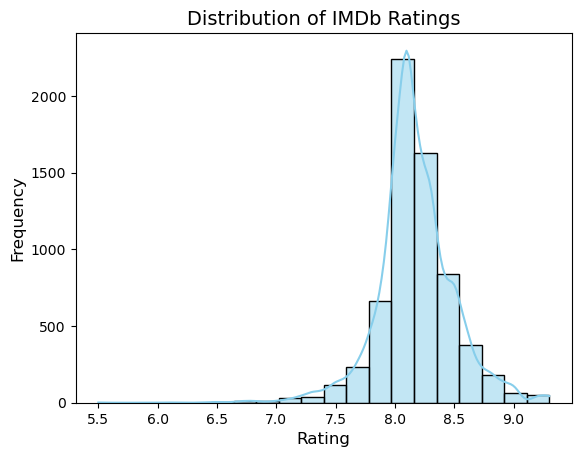

In [23]:
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

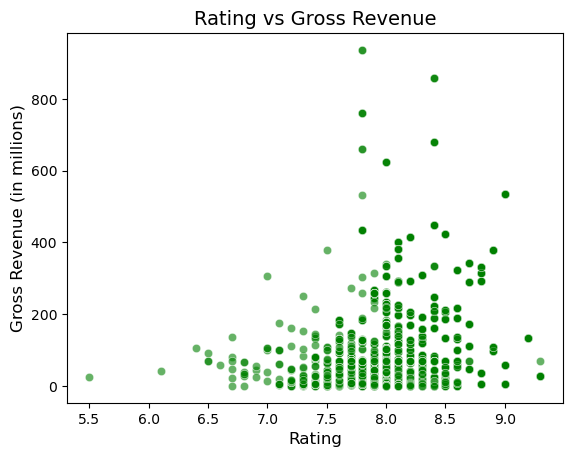

In [24]:
sns.scatterplot(x='Rating', y='Gross', data=df, alpha=0.6, color='green')
plt.title('Rating vs Gross Revenue', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Gross Revenue (in millions)', fontsize=12)
plt.show()

C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_30428\513435265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


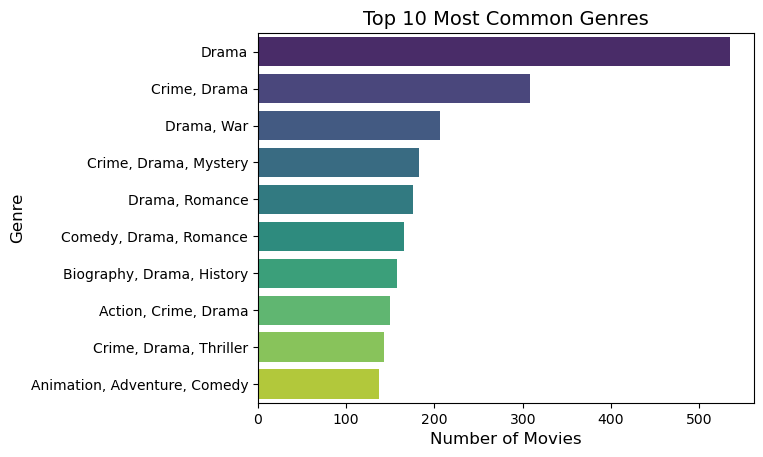

In [25]:
genre_counts = df['Genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Genres', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

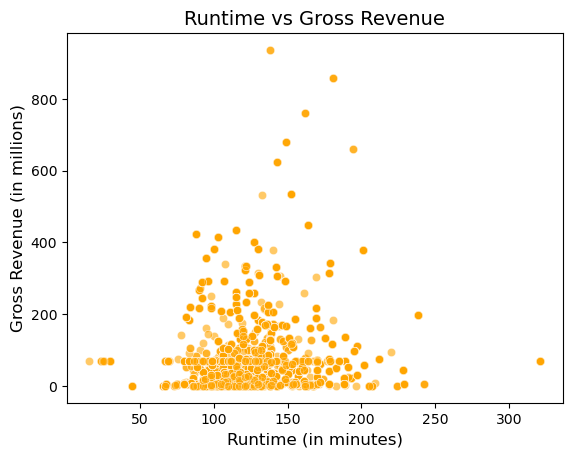

In [26]:
sns.scatterplot(x='RunTime', y='Gross', data=df, alpha=0.6, color='orange')
plt.title('Runtime vs Gross Revenue', fontsize=14)
plt.xlabel('Runtime (in minutes)', fontsize=12)
plt.ylabel('Gross Revenue (in millions)', fontsize=12)
plt.show()

C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_30428\3021947801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')


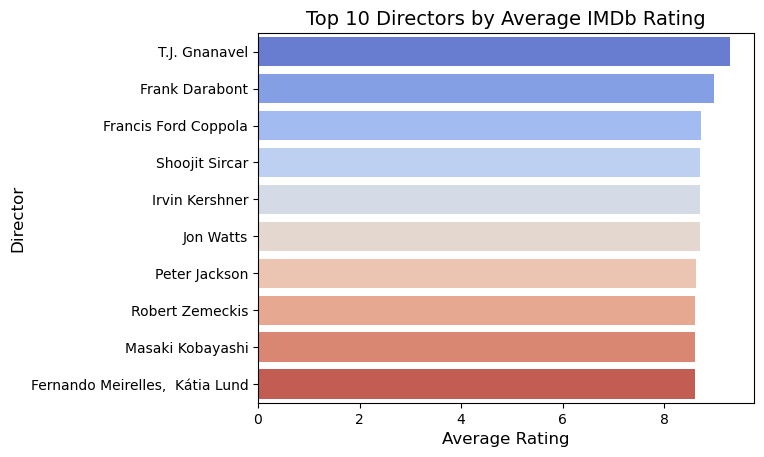

In [27]:
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors by Average IMDb Rating', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()

C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_30428\2763739880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='plasma')


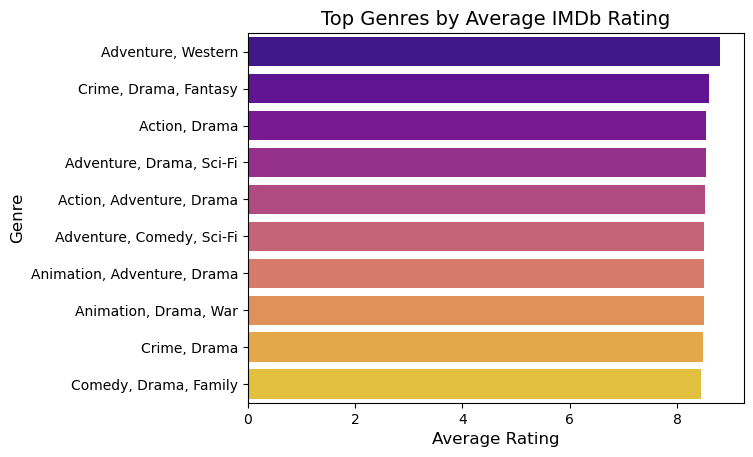

In [28]:
genre_ratings = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='plasma')
plt.title('Top Genres by Average IMDb Rating', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

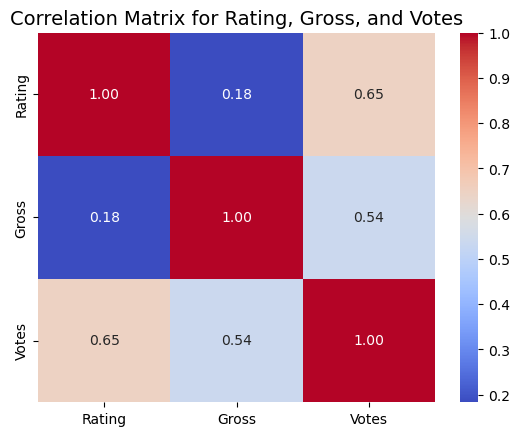

In [29]:
correlation_matrix = df[['Rating', 'Gross', 'Votes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Rating, Gross, and Votes', fontsize=14)
plt.show()

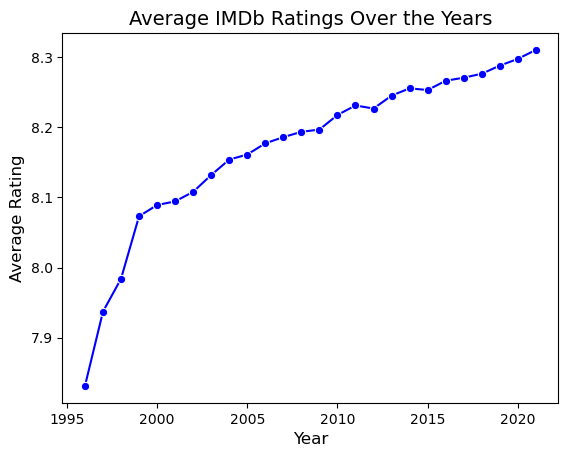

In [30]:
yearly_ratings = df.groupby('IMDByear')['Rating'].mean()
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values, marker='o', color='blue')
plt.title('Average IMDb Ratings Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Genre', 'Director', 'Cast1', 'Cast2']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



In [32]:
df['GrossCategory'] = pd.qcut(df['Gross'], q=3, labels=['Low', 'Medium', 'High'])

In [33]:
numerical_columns = ['Votes', 'Gross', 'RunTime']  
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [34]:
df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,GrossCategory
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,0.344262,4,8.6,90.000000,0.512040,0.344558,122,303,219,High
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,0.413115,136,9.3,80.000000,1.000000,0.030246,105,432,435,Medium
2,3,1996,/title/tt0117951/,Trainspotting,1996,0.252459,136,8.1,83.000000,0.260276,0.017605,75,148,174,Medium
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,0.295082,127,8.5,77.000000,0.411204,0.024908,52,268,185,Medium
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,0.045902,74,8.3,84.247268,0.017505,0.075481,280,359,473,Medium


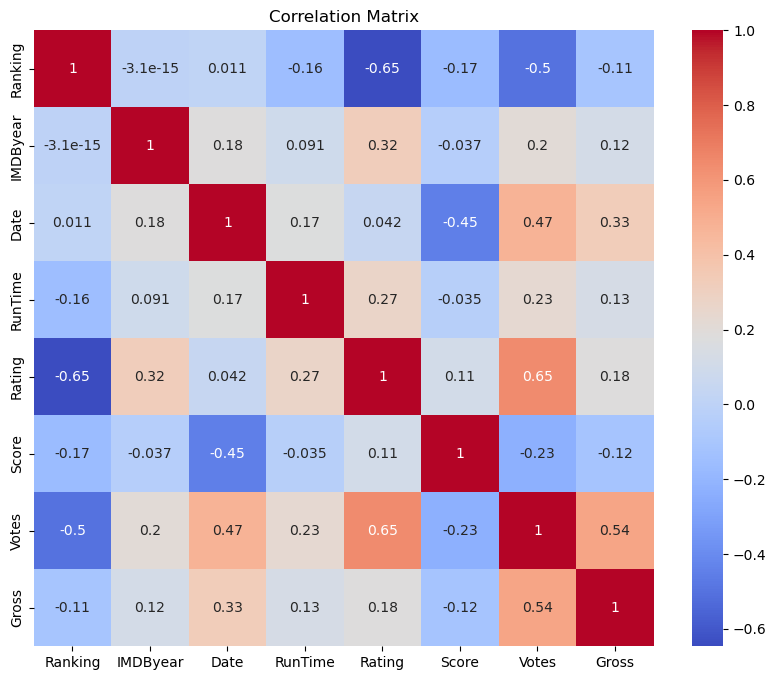

In [35]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X = df[['Ranking', 'IMDByear', 'RunTime', 'Genre', 'Votes', 'Gross']]  
y = df['Rating']
categorical_cols = ['Genre']  
numerical_cols = [col for col in X.columns if col not in categorical_cols] 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

k = 5 

feature_selection_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=k))
])

X_selected = feature_selection_pipeline.fit_transform(X, y)

selected_features = feature_selection_pipeline.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_features if i < len(numerical_cols)]
print("Selected Features:", selected_feature_names)

Selected Features: ['Ranking', 'Genre']


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def categorize_rating(rating):
    if rating < 6:
        return 'Low'
    elif 6 <= rating <= 8:
        return 'Medium'
    else:
        return 'High'

df['RatingCategory'] = df['Rating'].apply(categorize_rating)
X = df[['Ranking', 'Genre']]
y = df['RatingCategory'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_cols = ['Genre']
numerical_cols = ['Ranking']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

model = RandomForestClassifier(random_state=42)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.87      0.88      0.87       921
      Medium       0.69      0.68      0.69       379

    accuracy                           0.82      1300
   macro avg       0.78      0.78      0.78      1300
weighted avg       0.82      0.82      0.82      1300



In [38]:
def predict_new_data(new_data):
    return pipeline.predict(new_data)


new_data = pd.DataFrame({
    'Ranking': [15 ,60],
    'Genre': ['Action', 'Comedy']
})
predictions = predict_new_data(new_data)
print("Predictions for new data:", predictions)

Predictions for new data: ['High' 'High']


In [39]:
import joblib
joblib.dump(pipeline, 'movie_rating_pipeline.pkl')
loaded_pipeline = joblib.load('movie_rating_pipeline.pkl')
new_data = pd.DataFrame({
    'Ranking': [5, 20, 100],
    'Genre': ['Action', 'Comedy', 'Drama']
})
predictions = loaded_pipeline.predict(new_data)
print("Predictions on new data:", predictions)

Predictions on new data: ['High' 'High' 'High']


In [41]:
joblib.dump(pipeline, 'movie_rating_pipeline.pkl')
print("Pipeline has been saved successfully!")

Pipeline has been saved successfully!


In [42]:
import streamlit as st
pipeline = joblib.load('movie_rating_pipeline.pkl')
st.title("Movie Rating Classifier")
st.write("Classify movies into High or Medium ratings based on Ranking and Genre.")
ranking = st.number_input("Enter the Ranking (e.g., 50):", min_value=1, step=1)
genre = st.selectbox("Select the Genre:", ["Action", "Drama", "Comedy", "Thriller", "Horror"])
if st.button("Predict"):
   new_data = pd.DataFrame({'Ranking': [ranking], 'Genre': [genre]})
   prediction = pipeline.predict(new_data)
   st.success(f"The predicted rating category is: {prediction[0]}")


2024-12-27 15:10:08.272 
  command:

    streamlit run c:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-27 15:10:08.274 Session state does not function when running a script without `streamlit run`
